In [1]:
#Importing necessary libraries

import numpy as np # linear algebra, not needed
import pandas as pd #for data processing/handling csv file 
from matplotlib import pyplot as plt #for ploting charts
import seaborn as sns #visualization/for ploting heatmap
sns.set(style='darkgrid')
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV #fitting model with different parameters using k fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression 


In [3]:
df1 = pd.read_csv("Init_Data/digg_friends.csv",sep=',') #open csv file and save it to dataframe
# df1_friends2009 = df1["1214799565	"]
df1.head()


,1,1214799565,336224,266641
0,0,1230047012,336224,215086
1,1,1194104160,336224,151094
2,0,1199180573,336224,59378
3,0,1196465462,336224,8547
4,0,1195676634,336217,112748


In [4]:
df1.columns = ['1', '2', '3', '4']
df1


,1,2,3,4
0,0,1230047012,336224,215086
1,1,1194104160,336224,151094
2,0,1199180573,336224,59378
3,0,1196465462,336224,8547
4,0,1195676634,336217,112748
...,...,...,...,...
1731652,0,0,5,257604
1731653,1,1192718299,5,255107
1731654,1,1192718299,5,192330
1731655,0,0,5,171835


In [8]:
df1["2"]
count1 = (df1["2"] > 1230760800).sum()
count2 = (df1["2"] > 1233439200).sum()


count1, count2 , count1-count2

(701724, 604445, 97279)

In [3]:
indexes_to_keep = set(range(df1.shape[0])) - set(range(300000,1731657))

df_sliced = df1.take(list(indexes_to_keep))
df_sliced.to_csv('digg_friends_sliced.csv',index=False,sep=",",header=False, quoting=1)

df_sliced


,1,1214799565,336224,266641
0,0,1230047012,336224,215086
1,1,1194104160,336224,151094
2,0,1199180573,336224,59378
3,0,1196465462,336224,8547
4,0,1195676634,336217,112748
...,...,...,...,...
299995,0,1239689429,281886,263577
299996,0,1241485176,281886,260935
299997,0,1239762504,281886,257206
299998,0,1240790232,281886,256523


In [4]:
df2 = pd.read_csv("Init_Data/digg_votes1.csv",sep=',') #open csv file and save it to dataframe
df2

,1246573330,318,1
0,1246603391,399,1
1,1246573479,1749,1
2,1246599553,1964,1
3,1246568035,4362,1
4,1246570119,4610,1
...,...,...,...
3018191,1243937518,334596,3553
3018192,1243988005,334812,3553
3018193,1243909670,335028,3553
3018194,1243910982,335204,3553


In [5]:
indexes_to_keep = set(range(df2.shape[0])) - set(range(600000,3018196))

df_sliced = df2.take(list(indexes_to_keep))
df_sliced.to_csv('digg_votes1_sliced.csv',index=False,sep=",",header=False, quoting=1)
df_sliced


,1246573330,318,1
0,1246603391,399,1
1,1246573479,1749,1
2,1246599553,1964,1
3,1246568035,4362,1
4,1246570119,4610,1
...,...,...,...
599995,1246027467,140041,698
599996,1246056439,140259,698
599997,1246030843,140281,698
599998,1246050353,140519,698


In [7]:
df1.shape #show dataframe dimensions
# df2.shape #show dataframe dimensions

(1731657, 4)

In [8]:
#df.isna().sum() 
# #count null values of each column
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1731657 entries, 0 to 1731656
Data columns (total 4 columns):
 #   Column      Dtype
---  ------      -----
 0   1           int64
 1   1214799565  int64
 2   336224      int64
 3   266641      int64
dtypes: int64(4)
memory usage: 52.8 MB


In [8]:
df3 = pd.read_csv("node_features.csv",sep=',') #open csv file and save it to dataframe
# (df3['Avg_Cascade_Size'] != ).sum()
# df3['Participated'].nonzero().value_counts()
np.count_nonzero(df3, axis=0)

array([126650, 126650,  30613,    283], dtype=int64)

In [10]:

# variable to hold the count
cnt = 0
  
# list to hold visited values
visited = []
  
# loop for counting the unique
# values in height
for i in range(0, len(df1['1214799565'])):
    
    if df1['1214799565'][i] not in visited: 
        
        visited.append(df1['1214799565'][i])
          
        cnt += 1
  
print("No.of.unique values :",
      cnt)
  
print("unique values :",
      visited)

KeyboardInterrupt: 

In [ ]:
cnt = 0
  
# list to hold visited values
visited = []
  
# loop for counting the unique
# values in height
for i in range(0, len(df['167649'])):
    
    if df['167649'][i] not in visited: 
        
        visited.append(df['167649'][i])
          
        cnt += 1
  
print("No.of.unique values :",
      cnt)
  
print("unique values :",
      visited)

In [ ]:
df.smoking_status.str.count('Unknown').sum() #Unknown values of smoking_status should be considered as null

1544

In [ ]:
df['stroke'].value_counts(normalize=True) #Probabilities of patients having stoke or not are approximately 95% and 5% each, seems that we have an unbalanced classification

0    0.951272
1    0.048728
Name: stroke, dtype: float64

In [ ]:
df = df.drop(['id'], axis='columns') #id is not a variable that will affect prediction model
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df['gender'].value_counts() #Gender has only one row with value "Other" tha will not affect the training of the model,  we can drop it to simplify dataset  
#stroke.gender.str.count('Other').sum()


Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
df.drop(df[df.gender =="Other"].index, inplace=True) 
#stroke = stroke.drop(stroke[stroke.gender =="Other"].index)

In [ ]:
df['ever_married'] = df['ever_married'].replace(to_replace = ['No','Yes'],value = ['0','1'])
df['Residence_type'] = df['Residence_type'].replace(to_replace = ['Rural','Urban'],value = ['0','1'])
df['gender'] = df['gender'].replace(to_replace = ['Female','Male'],value = ['0','1'])
# df['smoking_status'] = df['smoking_status'].replace('Unknown',np.nan)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,202.21,NaN,never smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,Private,1,83.75,NaN,never smoked,0
5106,0,81.0,0,0,1,Self-employed,1,125.20,40.0,never smoked,0
5107,0,35.0,0,0,1,Self-employed,0,82.99,30.6,never smoked,0
5108,1,51.0,0,0,1,Private,0,166.29,25.6,formerly smoked,0


In [ ]:
#Printing some statistical information of all the numerical features.
df.describe()

,167649,324831,1229
count,1.888875e+06,1.888875e+06,1.888875e+06
mean,1.721511e+05,1.718065e+05,2.023816e+03
std,9.867409e+04,9.905727e+04,2.790806e+03
min,7.240000e+02,2.000000e+00,1.210000e+02
25%,9.889600e+04,8.661500e+04,5.670000e+02
50%,1.538060e+05,1.698060e+05,1.201000e+03
75%,2.616940e+05,2.566690e+05,2.585000e+03
max,3.360400e+05,3.362240e+05,2.406600e+04


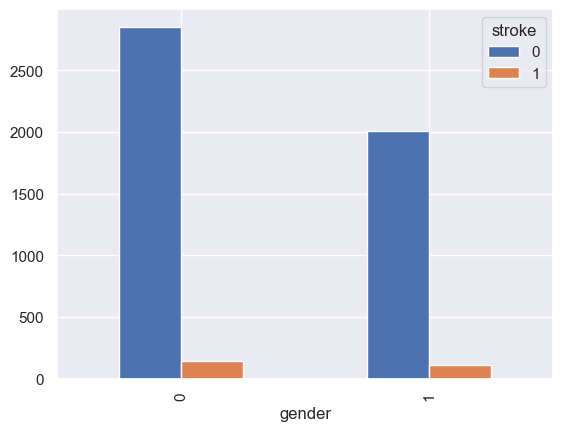

In [ ]:
pd.crosstab(df['gender'],df['stroke']).plot(kind='bar')
plt.show()

In [ ]:
probs=[]

for sex in df.gender.unique():
    probs.append({
        'sex' : df[df.gender==sex].stroke.mean()
    })
prob = pd.DataFrame(probs,columns=['sex']) #Compared with whole dataset, where the probability of a patient within the dataset having strokes before = 0.048, gender feature is not very helpful since the probs of each gender group are very much similar, except in the case gender=Other (only one record, not important factor).
prob

,sex
0,0.051064
1,0.047094


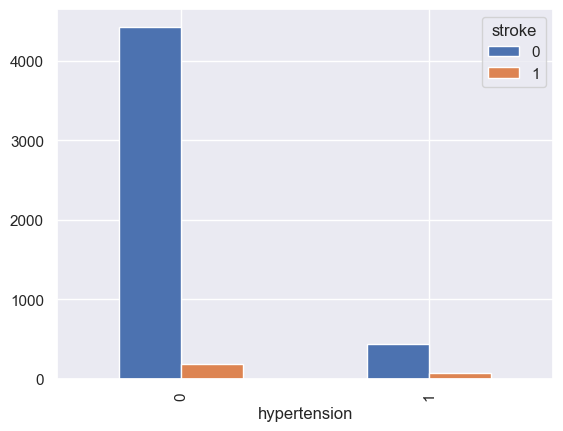

In [ ]:
pd.crosstab(df['hypertension'],df['stroke']).plot(kind='bar')
plt.show()

In [ ]:
probs=[]

for h in df.hypertension.unique():
    probs.append({
        'hypertension' : df[df.hypertension==h].stroke.mean()
    })
prob = pd.DataFrame(probs,columns=['hypertension']) 
prob
#Compared with whole dataset, where the probability of a patient within the
#dataset having strokes is 0.048, we can see the probability of having 
#stroke for patients knowing if they have hypertension or not are 
#significantly different. This suggests hypertension might 
#be very useful in predicting whether a patient will have a stroke or not.

,hypertension
0,0.039688
1,0.132530


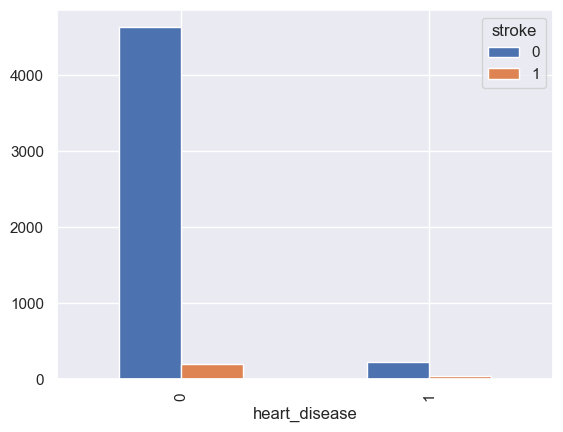

In [ ]:
pd.crosstab(df['heart_disease'],df['stroke']).plot(kind='bar')
plt.show()

In [ ]:
probs=[]

for h in df.heart_disease.unique():
    probs.append({
        'heart_disease' : df[df.heart_disease==h].stroke.mean()
    })
prob = pd.DataFrame(probs,columns=['heart_disease'])
prob
#Compared with whole dataset, where the probability of a patient within the
#dataset having strokes is 0.048, we can see the probability of having 
#stroke for patients knowing if they have a heart_disease are 
#significantly different. To be precise, if a patient doesn't have a heart disease the propability of having stroke is 0.1702. 
#This suggests heart_disease might be very useful in predicting whether a patient have stroke or not.

,heart_disease
0,0.170290
1,0.041796


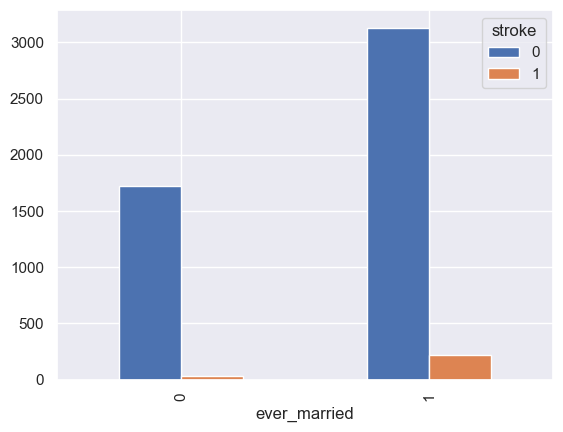

In [ ]:
pd.crosstab(df['ever_married'],df['stroke']).plot(kind='bar')
plt.show()

In [ ]:
probs=[]

for h in df.ever_married.unique():
    probs.append({
        'ever_married' : df[df.ever_married==h].stroke.mean()
    })
prob = pd.DataFrame(probs,columns=['ever_married'])
prob

,ever_married
0,0.065613
1,0.016515


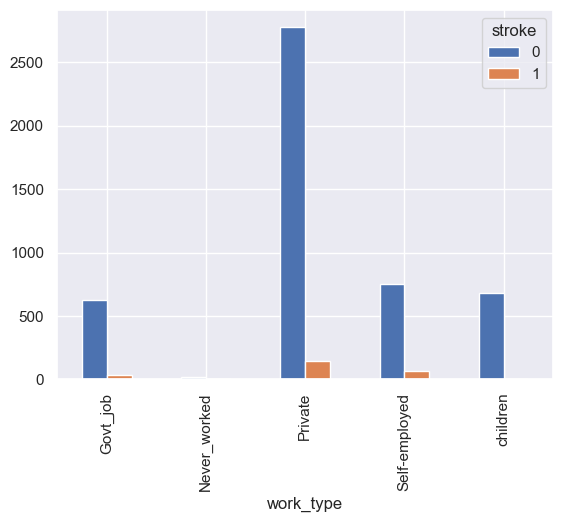

In [ ]:
pd.crosstab(df['work_type'],df['stroke']).plot(kind='bar')
plt.show()

In [ ]:
probs=[]

for h in df.work_type.unique():
    probs.append({
        'work_type' : df[df.work_type==h].stroke.mean()
    })
prob = pd.DataFrame(probs,columns=['work_type'])
prob

,work_type
0,0.050958
1,0.079365
2,0.050228
3,0.002911
4,0.000000


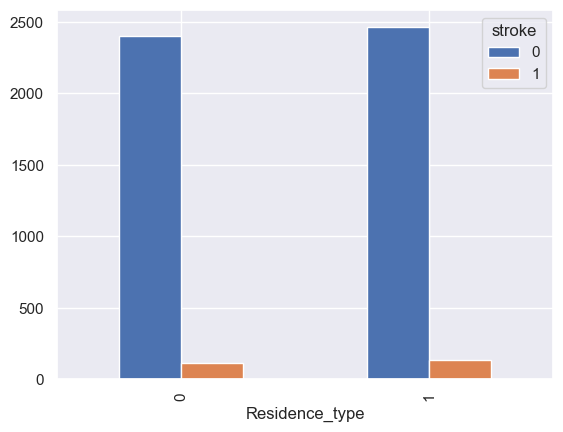

In [ ]:
pd.crosstab(df['Residence_type'],df['stroke']).plot(kind='bar') #same distribution, not critical label
plt.show()

In [ ]:
probs=[]

for h in df.Residence_type.unique():
    probs.append({
        'Residence_type' : df[df.Residence_type==h].stroke.mean()
    })
prob = pd.DataFrame(probs,columns=['Residence_type'])
prob

,Residence_type
0,0.052003
1,0.045364


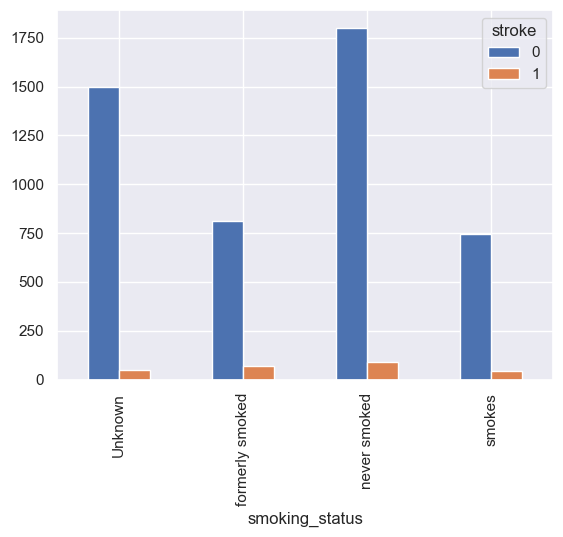

In [ ]:
pd.crosstab(df['smoking_status'],df['stroke']).plot(kind='bar')
plt.show()

In [ ]:
probs=[]

for h in df.smoking_status.unique():
    probs.append({
        'smoking_status' : df[df.smoking_status==h].stroke.mean()
    })
prob = pd.DataFrame(probs,columns=['smoking_status'])
prob

,smoking_status
0,0.079186
1,0.047569
2,0.053232
3,0.030440


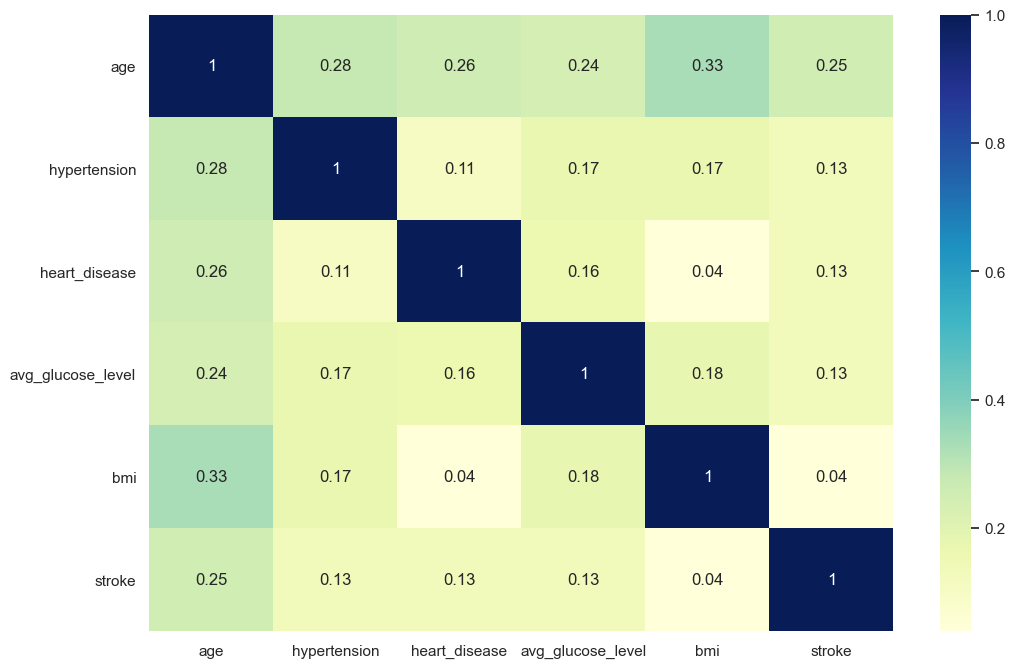

In [ ]:
corr = df.corr().round(2)
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()
#We see that age, hypertension, heart_disease_ and avg_glycose_level have a
#great impact on wether the patient will have a stroke.

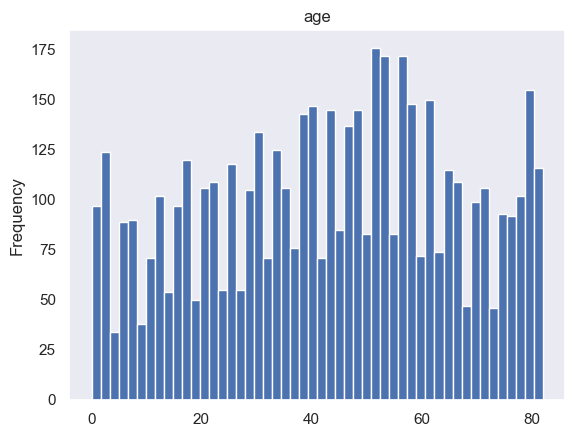

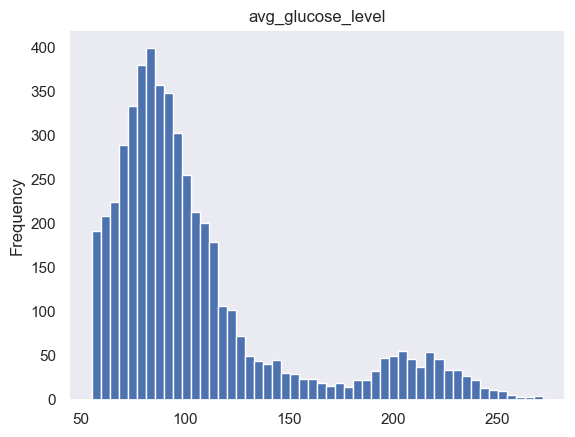

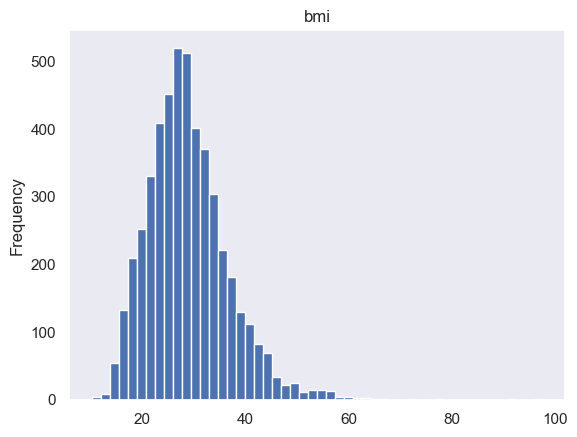

In [ ]:
#Numerical variables 
num=['age','avg_glucose_level','bmi']
for f in num:
    df[f].plot(kind='hist', bins=50)
    plt.title(f)
    plt.grid()
    plt.show()
#bmi,avg_glucose_level seem to be positive skewed(large number of data < mean)

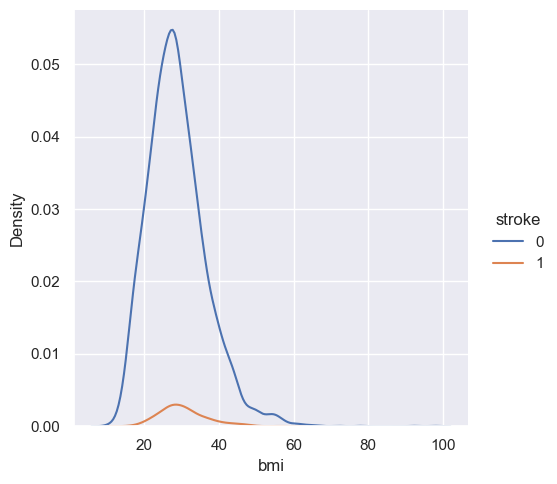

In [ ]:
sns.displot(df,x=df['bmi'],hue='stroke',kind='kde')
plt.show()

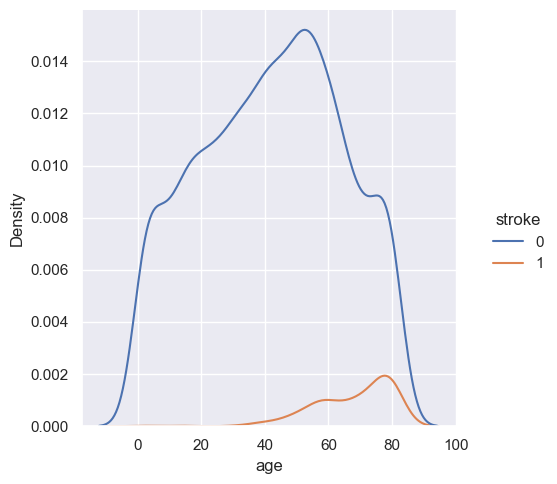

In [ ]:
sns.displot(df,x=df['age'],hue='stroke',kind='kde')
plt.show()

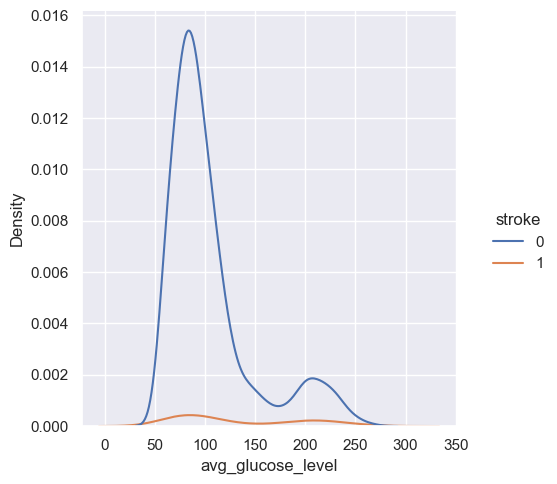

In [ ]:
sns.displot(df,x=df['avg_glucose_level'],hue='stroke',kind='kde')
plt.show()